In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import os, shutil

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

original_train_dataset_dir = '/home/arnav/Downloads/dogs_vs_cats/train/train'
original_test_dataset_dir = '/home/arnav/Downloads/dogs_vs_cats/test/test'

base_dir = '/home/arnav/anaconda3/envs/deeplearning/Getting started with deep learning/dogs_vs_cats/dataset'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


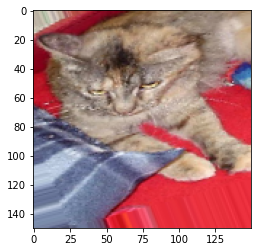

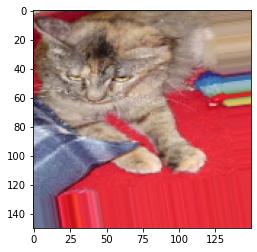

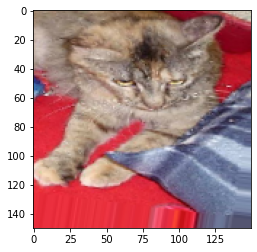

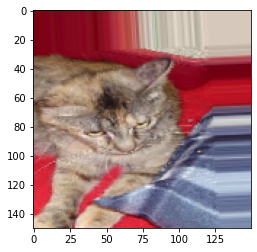

In [5]:
#example

from keras.preprocessing import image
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_cats_dir = os.path.join(train_dir, 'cats')
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

image_path = fnames[1]

img = image.load_img(image_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1, ) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1) : 
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0  :
        break
        
plt.show()

In [6]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

In [8]:
history = model.fit(
    train_generator, 
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=30)

Epoch 1/30
100/100 [==============================] - 13s 129ms/step - loss: 0.7069 - acc: 0.5090 - val_loss: 0.6836 - val_acc: 0.5683
Epoch 2/30
100/100 [==============================] - 12s 120ms/step - loss: 0.6764 - acc: 0.5765 - val_loss: 0.6702 - val_acc: 0.5400
Epoch 3/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6603 - acc: 0.5920 - val_loss: 0.6421 - val_acc: 0.6300
Epoch 4/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6324 - acc: 0.6380 - val_loss: 0.6535 - val_acc: 0.6583
Epoch 5/30
100/100 [==============================] - 12s 121ms/step - loss: 0.6250 - acc: 0.6355 - val_loss: 0.6287 - val_acc: 0.6317
Epoch 6/30
100/100 [==============================] - 12s 122ms/step - loss: 0.6061 - acc: 0.6675 - val_loss: 0.6188 - val_acc: 0.6667
Epoch 7/30
100/100 [==============================] - 12s 122ms/step - loss: 0.6142 - acc: 0.6630 - val_loss: 0.6180 - val_acc: 0.6617
Epoch 8/30
100/100 [==============================] - 1

In [9]:
model.save('cats_and_dogs_small_2.h5')

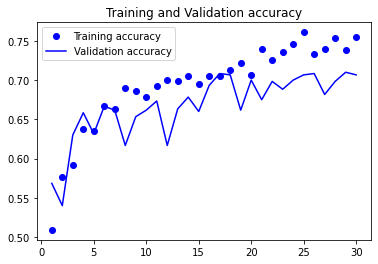

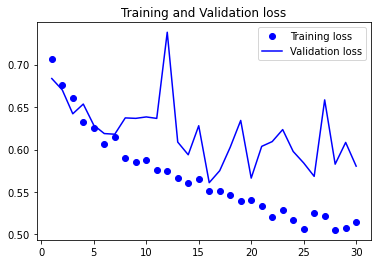

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.legend()

plt.show()